<a href="https://colab.research.google.com/github/Kunjoe7/Mutitask_test/blob/main/Ruiheng_Contribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title
!pip install easydict
!pip install torchtuples

import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


In [ ]:
!pip install sklearn
!pip install scikit-learn

!pip install sklearn_pandas
!pip install -U scikit-learn

from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import os
import time
import torch
import torchtuples as tt
import numpy as np
import easydict
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedKFold


## Data Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving processdata.csv to processdata.csv


In [ ]:
df = pd.read_csv('processdata.csv', encoding='latin-1')
data = df

In [ ]:
date_columns = ['Date.of.Last.Contact', 'Date.of.Diagnostic']
data[date_columns] = data[date_columns].apply(pd.to_datetime, errors='coerce')
has_na = data[date_columns].isna().any(axis=1)

if has_na.any():
#     max_last_contact_date = data['Date.of.Last.Contact'].max()
#     data['Survival_Time'] = (max_last_contact_date - data['Date.of.Diagnostic']).dt.days
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days
else:
    data['Survival_Time'] = (data['Date.of.Last.Contact'] - data['Date.of.Diagnostic']).dt.days

In [ ]:
data['indicater'] = np.where(data['Date.of.Death'].isna(), 0, 1)
columns_to_drop = ['Date.of.Death', 'Date.of.Last.Contact', 'Date.of.Diagnostic']


data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, MinMaxScaler


columns_to_one_hot = ['RCBP.Name', 'Raca.Color', 'State.Civil', 'Code.Profession', 'Name.Occupation', 'Status.Address',
                      'City.Address', 'Description.of.Topography', 'Topography.Code', 'Morphology.Description',
                      'Code.of.Morphology', 'Description.of.Disease', 'Illness.Code', 'Diagnostic.means', 'Extension',
                      'Type.of.Death']

for column in columns_to_one_hot:
    top_9_values = data[column].value_counts().nlargest(9).index
    data[column] = data[column].where(data[column].isin(top_9_values), 'other')

data = pd.get_dummies(data, columns=columns_to_one_hot)

columns_to_binarize = ['Gender', 'Indicator.of.Rare.Case']

lb = LabelBinarizer()
for column in columns_to_binarize:
    data[column] = lb.fit_transform(data[column])

scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])


print(data.head())


   Gender       Age  Indicator.of.Rare.Case  Survival_Time  indicater  \
0       1  0.283019                       0              0          1   
1       1  0.490566                       0              0          1   
2       1  0.698113                       0              0          1   
3       1  0.556604                       0              0          1   
4       0  0.122642                       0           3959          0   

   RCBP.Name_RCBP BELO HORIZONTE  RCBP.Name_RCBP CAMPINAS-UNICAMP  \
0                          False                             True   
1                          False                             True   
2                          False                             True   
3                          False                             True   
4                          False                             True   

   RCBP.Name_RCBP DISTRITO FEDERAL  RCBP.Name_RCBP DRS BARRETOS  \
0                            False                        False   
1           

In [ ]:
data.head()

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,3959,0,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [ ]:
print(list(data.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIME

In [ ]:
# change the batch size from 1024 to 3222 to improve the performance
# created by Xinyu modified by Jingyan
args = easydict.EasyDict({
    "batch_size": 2048,
    "cuda": True, # should set it to be true when using gpu, otherwise data would be on two devices
    "lr": 0.05,
    "seed": 1111,
    "reduce_rate": 0.95,
    "epochs": 200,
    "clip": 5.0,
    "log_interval":10,
})

In [ ]:
def cycle(iterable):
    while True:
        for x in iterable:
            yield x

In [ ]:
device = torch.device("cuda" if args.cuda else "cpu")
dtype = torch.FloatTensor
if torch.cuda.is_available() and args.cuda:
    dtype = torch.cuda.FloatTensor

np.random.seed(1234)
_ = torch.manual_seed(123)

In [ ]:
print(device)

cuda


In [ ]:
from sklearn import preprocessing

In [ ]:
data[data['indicater']==1]

,Gender,Age,Indicator.of.Rare.Case,Survival_Time,indicater,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,0,1,False,True,False,False,False,...,False,True,False,False,False,True,False,True,False,False
5,0,0.754717,0,0,1,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,0,0.613208,0,1475,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14751,1,0.528302,0,1302,1,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14752,1,0.122642,0,936,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
14753,1,0.773585,0,420,1,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
X = data.drop(['Survival_Time', 'indicater'], axis=1)
time_all = data['Survival_Time'].values
event_all = data['indicater'].values

In [ ]:
# X_normalize
X

,Gender,Age,Indicator.of.Rare.Case,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,RCBP.Name_RCBP MANAUS,RCBP.Name_RCBP MATO GROSSO (INTERIOR),...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,1,0.490566,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,0.698113,0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,1,0.556604,0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,0.122642,0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,0,0.613208,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14751,1,0.528302,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
14752,1,0.122642,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
14753,1,0.773585,0,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
max_time = data['Survival_Time'].max()
max_time

7408

In [ ]:
print(list(X.columns))

['Gender', 'Age', 'Indicator.of.Rare.Case', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.

In [ ]:

check = pd.DataFrame(columns=['Gender', 'Age', 'Indicator.of.Rare.Case', 'Survival_Time', 'indicater', 'RCBP.Name_RCBP BELO HORIZONTE', 'RCBP.Name_RCBP CAMPINAS-UNICAMP', 'RCBP.Name_RCBP DISTRITO FEDERAL', 'RCBP.Name_RCBP DRS BARRETOS', 'RCBP.Name_RCBP FORTALEZA', 'RCBP.Name_RCBP MANAUS', 'RCBP.Name_RCBP MATO GROSSO (INTERIOR)', 'RCBP.Name_RCBP NATAL', 'RCBP.Name_RCBP PORTO ALEGRE', 'RCBP.Name_other', 'Raca.Color_AMARELA', 'Raca.Color_BRANCO', 'Raca.Color_IND?GENA', 'Raca.Color_PARDA', 'Raca.Color_PRETA', 'Raca.Color_other', 'State.Civil_CASADO', 'State.Civil_SEPARADO JUDICIALMENTE', 'State.Civil_SOLTEIRO', 'State.Civil_UNI?O CONSENSUAL', 'State.Civil_VI?VO', 'State.Civil_other', 'Code.Profession_0.0', 'Code.Profession_111.0', 'Code.Profession_141.0', 'Code.Profession_512.0', 'Code.Profession_514.0', 'Code.Profession_516.0', 'Code.Profession_622.0', 'Code.Profession_715.0', 'Code.Profession_782.0', 'Code.Profession_other', 'Name.Occupation_CONDUTORES DE VE?CULOS E OPERADORES DE EQUIPAMENTOS DE ELEVA??O E DE MOVIMENTA??O DE CARGAS   \t', 'Name.Occupation_GERENTES DE PRODU??O E OPERA??ES  \t', 'Name.Occupation_MEMBROS SUPERIORES DO PODER LEGISLATIVO, EXECUTIVO E JUDICI?RIO   \t', 'Name.Occupation_SEM INFORMA??O\t', 'Name.Occupation_TRABALHADORES AGR?COLAS   \t', 'Name.Occupation_TRABALHADORES DA CONSTRU??O CIVIL E OBRAS P?BLICAS\t', 'Name.Occupation_TRABALHADORES DOS SERVI?OS DOM?STICOS EM GERAL\t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE ADMINISTRA??O, CONSERVA??O E MANUTEN??O DE EDIF?CIOS E LOGRADOUROS  \t', 'Name.Occupation_TRABALHADORES NOS SERVI?OS DE EMBELEZAMENTO E CUIDADOS PESSOAIS   \t', 'Name.Occupation_other', 'Status.Address_AMAZONAS', 'Status.Address_CEAR?', 'Status.Address_DISTRITO FEDERAL', 'Status.Address_MATO GROSSO ', 'Status.Address_MINAS GERAIS', 'Status.Address_RIO DE JANEIRO', 'Status.Address_RIO GRANDE DO NORTE', 'Status.Address_RIO GRANDE DO SUL', 'Status.Address_S?O PAULO', 'Status.Address_other', 'City.Address_BARRETOS', 'City.Address_BEBEDOURO', 'City.Address_BRAS?LIA', 'City.Address_CAMPINAS', 'City.Address_COLINA', 'City.Address_GUA?RA', 'City.Address_MONTE AZUL PAULISTA', 'City.Address_OL?MPIA', 'City.Address_VIRADOURO', 'City.Address_other', 'Description.of.Topography_COLO DO UTERO, SOE', 'Description.of.Topography_ESTOMAGO, SOE', 'Description.of.Topography_LOCALIZACAO PRIMARIA DESCONHECIDA, SOE', 'Description.of.Topography_MAMA , SOE', 'Description.of.Topography_MEDULA OSSEA', 'Description.of.Topography_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Topography_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Topography_PROSTATA, SOE', 'Description.of.Topography_PULMAO, SOE', 'Description.of.Topography_other', 'Topography.Code_C169', 'Topography.Code_C349', 'Topography.Code_C421', 'Topography.Code_C443', 'Topography.Code_C446', 'Topography.Code_C509', 'Topography.Code_C539', 'Topography.Code_C619', 'Topography.Code_C809', 'Topography.Code_other', 'Morphology.Description_ADENOCARCINOMA TUBULAR', 'Morphology.Description_ADENOCARCINOMA, SOE', 'Morphology.Description_CARCINOMA BASO CELULAR, SOE', 'Morphology.Description_CARCINOMA BASOCELULAR, SOE', 'Morphology.Description_CARCINOMA DE CELULAS ESCAMOSAS, SOE', 'Morphology.Description_CARCINOMA DUCTAL INFILTRANTE', 'Morphology.Description_CARCINOMA ESCAMOCELULAR, SOE', 'Morphology.Description_NEOPLASIA MALIGNA', 'Morphology.Description_NEOPLASMA MALIGNO', 'Morphology.Description_other', 'Code.of.Morphology_80003', 'Code.of.Morphology_80703', 'Code.of.Morphology_80903', 'Code.of.Morphology_81403', 'Code.of.Morphology_82113', 'Code.of.Morphology_85003', 'Code.of.Morphology_95903', 'Code.of.Morphology_97323', 'Code.of.Morphology_98613', 'Code.of.Morphology_other', 'Description.of.Disease_BRONQUIOS OU PULMOES, SOE', 'Description.of.Disease_COLO DO UTERO, SOE', 'Description.of.Disease_ESTOMAGO, SOE', 'Description.of.Disease_LOCALIZACAO PRIMARIA DESCONHECIDA', 'Description.of.Disease_MAMA , SOE', 'Description.of.Disease_PELE DE OUTRAS PARTES DA FACE', 'Description.of.Disease_PELE DO MEMBRO SUPERIOR E DO OMBRO', 'Description.of.Disease_PELE DO TRONCO', 'Description.of.Disease_PROSTATA', 'Description.of.Disease_other', 'Illness.Code_C169', 'Illness.Code_C349', 'Illness.Code_C443', 'Illness.Code_C445', 'Illness.Code_C446', 'Illness.Code_C509', 'Illness.Code_C61', 'Illness.Code_C80', 'Illness.Code_C859', 'Illness.Code_other', 'Diagnostic.means_CITOLOGIA', 'Diagnostic.means_CL?NICO', 'Diagnostic.means_HISTOLOGIA DO TUMOR PRIM?RIO', 'Diagnostic.means_PESQUISA', 'Diagnostic.means_SDO', 'Diagnostic.means_other', 'Extension_IN SITU', 'Extension_LOCALIZADO', 'Extension_MET?STASE', 'Extension_N?O SE APLICA', 'Type.of.Death_C?NCER', 'Type.of.Death_N?O C?NCER', 'Type.of.Death_other'])

columns = list(check.columns)
for i, c in enumerate(columns):
    if 'extension' in c.lower():
        print(f"{c} - {i}")

for i, c in enumerate(columns):
    if 'illness.code' in c.lower():
        print(f"{c} - {i}")

Extension_IN SITU - 133
Extension_LOCALIZADO - 134
Extension_MET?STASE - 135
Extension_N?O SE APLICA - 136
Illness.Code_C169 - 117
Illness.Code_C349 - 118
Illness.Code_C443 - 119
Illness.Code_C445 - 120
Illness.Code_C446 - 121
Illness.Code_C509 - 122
Illness.Code_C61 - 123
Illness.Code_C80 - 124
Illness.Code_C859 - 125
Illness.Code_other - 126


Data divided into MTL form

In [ ]:
import numpy as np

# Take the maximum time and divide it into any number of intervals
Tmax = 7500
num_intervals = 7

intervals = [(i * (Tmax // num_intervals), (i + 1) * (Tmax // num_intervals)) for i in range(num_intervals)]

Y = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, time_val in enumerate(time_all):
    for j, (left, right) in enumerate(intervals):
        if time_val > right or (left < time_val <= right):
            Y[i, j] = 1

Y = torch.Tensor(Y)

print(Y.shape)

torch.Size([14755, 7])


In [ ]:
Y

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
# Creat mask matrix
W = np.zeros((len(time_all), num_intervals), dtype=np.int_)

for i, (time_val, event_val) in enumerate(zip(time_all, event_all)):
    for j, (left, right) in enumerate(intervals):
        if event_val == 0 and time_val < left:
            W[i, j] = 0
        else:
            W[i, j] = 1

W = torch.Tensor(W)

In [ ]:
print(W.shape)
# So far all the codes are done by Xinyu

torch.Size([14755, 7])


## Define and Apply the DataLoader
- Introduced the dataloader to deal with the dataset, which would be helpful in the training and testing steps

In [ ]:
# Jingyan adds the dataloader
from torch.utils.data import Dataset, DataLoader, random_split

class MultiTaskDataset(Dataset):
    def __init__(self, data, targets, masks, event_all):
        self.data = data
        self.targets = targets
        self.masks = masks
        self.event_all = event_all

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], [self.targets[i][idx] for i in range(len(self.targets))], [self.masks[i][idx] for i in range(len(self.masks))], self.event_all[idx]


In [ ]:
for col in X.columns:       # modified by Ali Sam. (when I try to run the code, the transformation to tensor gives an error of data type, so I have converted the boolean coloumns to int dtype first)
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)
X_use = torch.tensor(X.values, dtype=torch.float32)
X_use.shape
X

,Gender,Age,Indicator.of.Rare.Case,RCBP.Name_RCBP BELO HORIZONTE,RCBP.Name_RCBP CAMPINAS-UNICAMP,RCBP.Name_RCBP DISTRITO FEDERAL,RCBP.Name_RCBP DRS BARRETOS,RCBP.Name_RCBP FORTALEZA,RCBP.Name_RCBP MANAUS,RCBP.Name_RCBP MATO GROSSO (INTERIOR),...,Diagnostic.means_PESQUISA,Diagnostic.means_SDO,Diagnostic.means_other,Extension_IN SITU,Extension_LOCALIZADO,Extension_MET?STASE,Extension_N?O SE APLICA,Type.of.Death_C?NCER,Type.of.Death_N?O C?NCER,Type.of.Death_other
0,1,0.283019,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,1,0.490566,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,0.698113,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,1,0.556604,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,0.122642,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,0,0.613208,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
14751,1,0.528302,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
14752,1,0.122642,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
14753,1,0.773585,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
Y_transform = [Y[:, i:i+1] for i in range(Y.size(1))]
print(Y_transform[0].shape)
W_transform = [W[:, i:i+1] for i in range(W.size(1))]
print(W_transform[0].shape)

torch.Size([14755, 1])
torch.Size([14755, 1])


In [ ]:
#Xinyu
full_dataset = MultiTaskDataset(X_use, Y_transform, W_transform, event_all)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size

train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=True, drop_last=True)

In [ ]:
# created by Jingyan to check the data shape before training
for x, y, w, e in train_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    in_features = x.shape[1]
    out_features = len(y)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [ ]:
out_features

7

In [ ]:
for x, y, w, e in test_loader:
    print(x.shape)
    print(len(y), y[0].shape)
    print(len(w), w[0].shape)
    print(e.shape)
    break

torch.Size([2048, 138])
7 torch.Size([2048, 1])
7 torch.Size([2048, 1])
torch.Size([2048])


In [ ]:
e_train = []
for x, y, w, e in train_loader:
  e_train.append(e)

event_train = torch.cat(e_train, dim=0)

In [ ]:
event_train.shape

torch.Size([10240])

## Original Code (comment out)

In [ ]:
# num_columns = Y_train.shape[1]
# Y_train_cols = []
# for i in range(num_columns):
#     col = Y_train[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_train_cols.append(locals()[var_name])

# num_test_columns = Y_test.shape[1]
# Y_test_cols = []
# for i in range(num_test_columns):
#     col = Y_test[:, i]
#     var_name = 'Y' + str(i+1)
#     locals()[var_name] = col
#     Y_test_cols.append(locals()[var_name])

In [ ]:
# num_columns = W_train.shape[1]

# W_train_cols = []

# for i in range(num_columns):
#   col = W_train[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_train_cols.append(locals()[var_name])

# num_test_columns = W_test.shape[1]

# W_test_cols = []

# for i in range(num_test_columns):
#   col = W_test[:, i]
#   var_name = 'W' + str(i+1)
#   locals()[var_name] = col
#   W_test_cols.append(locals()[var_name])

In [ ]:
# print(W_train_cols[1].shape)
# print(W_test_cols[1].shape)
# print(Y_train_cols[1].shape)
# print(Y_test_cols[1].shape)

## Model
- Changed the loss function to match the data format using dataloader

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Made by Xinyu and modified by Dr.Li and Jingyan
# Modified by Ruiheng
import torch.nn.init as init

class MultiTaskModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(MultiTaskModel, self).__init__()
        self.num_tasks = out_features
        self.input_features = in_features

        self.shared_layers = nn.Sequential(
            nn.Linear(in_features, 256),
            nn.Mish(),# Use mish instead of relu to reduce neuronal death
            nn.BatchNorm1d(256),

            nn.Linear(256, 256),
            nn.Mish(),
            nn.BatchNorm1d(256),

            nn.Linear(256, 128),
            nn.Mish(),
            nn.BatchNorm1d(128),
        )


        self.task_layers = nn.ModuleList([nn.Linear(128, 1) for _ in range(out_features)])

        self._init_weights()
# Use appropriate weights to initialize and reduce the problem of neuronal death in the early stages of training.
    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    init.constant_(m.bias, 0)

# This forward propagation logic defines the chain propagation of our idea
    def forward(self, x):
        shared_output = self.shared_layers(x)
        task_outputs = []
        for i, task_layer in enumerate(self.task_layers):
            if i == 0:
                task_output = torch.sigmoid(task_layer(shared_output))
            else:
                task_output = torch.sigmoid(task_layer(shared_output)) * task_outputs[-1]
            task_outputs.append(task_output)

        return task_outputs# Here I difined the S(x)


    # def custom_loss(self, task_outputs, Y_train_cols, W_train_cols):
    #     loss = 0
    #     for i, task_output in enumerate(task_outputs):
    #         task_target = Y_train_cols[i].unsqueeze(1)
    #         task_mask = W_train_cols[i].unsqueeze(1)
    #         task_loss = F.binary_cross_entropy_with_logits(task_output, task_target.float(), reduction='none')
    #         task_loss = task_loss * task_mask.float()
    #         loss += task_loss.sum() / task_mask.sum()
    #     return loss#There are how I use mask matrix W to control the loss function

# Modified by Jingyan
    def custom_loss(self, task_outputs, targets, masks):
        loss = 0
        for i, task_output in enumerate(task_outputs):
            task_target = targets[i]
            task_mask = masks[i]
            task_loss = F.binary_cross_entropy(task_output, task_target.float(), reduction='none')
            task_loss = task_loss * task_mask.float()
            loss += task_loss.sum() / task_mask.sum()
        return loss

In [ ]:
# made by Ruiheng
#Referenced this code https://github.com/jingyanjiang/attributionpriors_multitask.git
import functools
import operator
import torch
from torch.autograd import grad
from torch.utils.data import DataLoader

def gather_nd(params, indices):
    max_value = functools.reduce(operator.mul, list(params.size())) - 1
    indices = indices.t().long()
    ndim = indices.size(0)
    idx = torch.zeros_like(indices[0]).long()
    m = 1
    for i in range(ndim)[::-1]:
        idx += indices[i]*m
        m *= params.size(i)

    idx[idx < 0] = 0
    idx[idx > max_value] = 0
    return torch.take(params, idx)

class IG_Attribution(object):
    def __init__(self, background_dataset, batch_size, random_alpha=True, k=1, scale_by_inputs=True):
        self.random_alpha = random_alpha
        self.k = k
        self.scale_by_inputs = scale_by_inputs
        self.batch_size = batch_size
        self.ref_set = background_dataset
        self.ref_sampler = DataLoader(
            dataset=background_dataset,
            batch_size=batch_size * k,
            shuffle=True,
            drop_last=True)
        return

    def _get_ref_batch(self, k=None):
        return next(iter(self.ref_sampler))[0].float()

    def _get_samples_input(self, input_tensor, reference_tensor):
        input_dims = list(input_tensor.size())[1:]
        num_input_dims = len(input_dims)

        batch_size = reference_tensor.size()[0]
        k_ = reference_tensor.size()[1]

        # Grab a [batch_size, k]-sized interpolation sample
        if self.random_alpha:
            t_tensor = torch.FloatTensor(batch_size, k_).uniform_(0, 1).to(device)
        else:
            if k_ == 1:
                t_tensor = torch.cat([torch.Tensor([1.0]) for i in range(batch_size)]).to(device)
            else:
                t_tensor = torch.cat([torch.linspace(0, 1, k_) for i in range(batch_size)]).to(device)

        shape = [batch_size, k_] + [1] * num_input_dims
        interp_coef = t_tensor.view(*shape)

        # Evaluate the end points
        end_point_ref = (1.0 - interp_coef) * reference_tensor

        input_expand_mult = input_tensor.unsqueeze(1)
        end_point_input = interp_coef * input_expand_mult

        # A fine Affine Combine
        samples_input = end_point_input + end_point_ref
        return samples_input

    def _get_samples_delta(self, input_tensor, reference_tensor):
        input_expand_mult = input_tensor.unsqueeze(1)
        sd = input_expand_mult - reference_tensor
        return sd

    def _get_grads(self, samples_input, model, sparse_labels=None):
        # samples_input.requires_grad = True
        samples_input = samples_input.detach().clone().requires_grad_(True)
        temp_output = model(samples_input[:, 0])
        grad_tensors = [torch.zeros(samples_input.shape).float().to(device) for _ in range(len(temp_output))]

        # For each task, do below
        for i in range(self.k):
            # Should store the input instead of getting the slice again
            # Otherwise, the grad() cannot recognize the input
            particular_slice = samples_input[:, i]
            batch_outputs = model(particular_slice)
            tasks_grads = []
            for idx in range(len(batch_outputs)):
                batch_output = batch_outputs[idx]
                if batch_output.size(1) > 1:
                    sample_indices = torch.arange(0, batch_output.size(0)).to(device)
                    indices_tensor = torch.cat([
                        sample_indices.unsqueeze(1),
                        sparse_labels.unsqueeze(1)], dim=1)
                    batch_output = gather_nd(batch_output, indices_tensor)

                model_grads = grad(
                    outputs=batch_output,
                    inputs=particular_slice,
                    grad_outputs=torch.ones_like(batch_output).to(device),
                    create_graph=True)
                grad_tensors[idx][:, i, :] = model_grads[0]

        return grad_tensors
# Modified by Ruiheng
    def shap_values(self, model, input_tensor, sparse_labels=None):
        reference_tensor = self._get_ref_batch()
        shape = reference_tensor.shape
        reference_tensor = reference_tensor.view(
            self.batch_size,
            self.k,
            *(shape[1:])).to(device)

        samples_input = self._get_samples_input(input_tensor, reference_tensor)
        samples_delta = self._get_samples_delta(input_tensor, reference_tensor)
        grad_tensor = self._get_grads(samples_input, model, sparse_labels)
        mult_grads_list = [samples_delta * grad_tensor[i] if self.scale_by_inputs else grad_tensor[i] for i in
                           range(len(grad_tensor))]
        expected_grads_list = [mult_grads_list[i].mean(1) for i in range(len(mult_grads_list))]

        #transform a stacked two-dimensional tensor into a three-dimensional one
        expected_grads = torch.stack(expected_grads_list, dim=-1)

        return expected_grads

## Training
- Rewrote the training part

In [ ]:
# Jingyan's attribution
# Modifed by Ruiheng suit for task 2
import torch.cuda as cuda
from tqdm import tqdm

IGAT = IG_Attribution(train_dataset, args.batch_size, k=1,scale_by_inputs=False)

model = MultiTaskModel(in_features, out_features).to(device)
model = model.to(device)
model.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# During loss training, please carefully observe
# where the gradient integral is calculated,
# and then find the corresponding source code.
# In the logic of the source code, replace the baseline with CF

loss_records = []
num_epochs = 75
for epoch in range(num_epochs):
    total_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch + 1}/{num_epochs}")

    for batch_idx, (X_train, targets, masks, event_train) in progress_bar:
        X_train = X_train.to(device)
        targets = [target.to(device) for target in targets]
        masks = [mask.to(device) for mask in masks]


        optimizer.zero_grad()
        task_outputs_ = model(X_train)
        expected_gradients = IGAT.shap_values(model, X_train)
        print(expected_gradients.shape)
        print(torch.all(expected_gradients == 0))

# Modifed by Ruiheng

        # smooth term

        slice1 = expected_gradients[:, :, 1:]
        slice2 = expected_gradients[:, :, :-1]

        #Manhattan distance between consecutive elements
        manhattan_distances = torch.abs(slice1 - slice2)

        total_manhattan_distance = torch.sum(manhattan_distances)

        # weights that could be adjusted
        lambda1 = 0.5

        loss = model.custom_loss(task_outputs_, targets, masks) + lambda1 * total_manhattan_distance
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        progress_bar.set_postfix({'Loss': loss.item()/100})

    avg_loss = total_loss / len(train_loader)
    loss_records.append(avg_loss)
    print(f'End of Epoch {epoch + 1}, Average Loss: {avg_loss/100:.4f}')

print('Training completed')


Epoch 1/75:  20%|██        | 1/5 [00:00<00:01,  2.38it/s, Loss=200]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 1/75:  40%|████      | 2/5 [00:00<00:00,  3.11it/s, Loss=195]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 1/75:  60%|██████    | 3/5 [00:01<00:00,  2.78it/s, Loss=187]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 1/75:  80%|████████  | 4/5 [00:01<00:00,  3.13it/s, Loss=185]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 1/75: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s, Loss=180]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 1, Average Loss: 189.3847


Epoch 2/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=175]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 2/75:  40%|████      | 2/5 [00:00<00:00,  3.13it/s, Loss=169]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 2/75:  60%|██████    | 3/5 [00:01<00:00,  2.75it/s, Loss=165]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 2/75:  80%|████████  | 4/5 [00:01<00:00,  3.13it/s, Loss=158]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 2/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=155]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 2, Average Loss: 164.3455


Epoch 3/75:  20%|██        | 1/5 [00:00<00:01,  2.33it/s, Loss=150]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 3/75:  40%|████      | 2/5 [00:00<00:00,  3.07it/s, Loss=148]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 3/75:  60%|██████    | 3/5 [00:01<00:00,  2.65it/s, Loss=145]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 3/75:  80%|████████  | 4/5 [00:01<00:00,  2.53it/s, Loss=140]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 3/75: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s, Loss=135]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 3, Average Loss: 143.6899


Epoch 4/75:  20%|██        | 1/5 [00:00<00:01,  2.40it/s, Loss=133]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 4/75:  40%|████      | 2/5 [00:00<00:00,  3.12it/s, Loss=129]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 4/75:  60%|██████    | 3/5 [00:01<00:00,  2.76it/s, Loss=127]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 4/75:  80%|████████  | 4/5 [00:01<00:00,  2.58it/s, Loss=123]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 4/75: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s, Loss=120]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 4, Average Loss: 126.5492


Epoch 5/75:  20%|██        | 1/5 [00:00<00:01,  2.39it/s, Loss=118]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 5/75:  40%|████      | 2/5 [00:00<00:00,  3.06it/s, Loss=116]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 5/75:  60%|██████    | 3/5 [00:01<00:00,  2.74it/s, Loss=113]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 5/75:  80%|████████  | 4/5 [00:01<00:00,  2.57it/s, Loss=109]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 5/75: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s, Loss=108]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 5, Average Loss: 112.6766


Epoch 6/75:  20%|██        | 1/5 [00:00<00:01,  2.48it/s, Loss=107]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 6/75:  40%|████      | 2/5 [00:00<00:01,  2.39it/s, Loss=103]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 6/75:  60%|██████    | 3/5 [00:01<00:00,  2.91it/s, Loss=101]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 6/75:  80%|████████  | 4/5 [00:01<00:00,  2.70it/s, Loss=99.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 6/75: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s, Loss=96.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 6, Average Loss: 101.4232


Epoch 7/75:  20%|██        | 1/5 [00:00<00:01,  2.43it/s, Loss=95.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 7/75:  40%|████      | 2/5 [00:00<00:01,  2.45it/s, Loss=92.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 7/75:  60%|██████    | 3/5 [00:01<00:00,  2.96it/s, Loss=91.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 7/75:  80%|████████  | 4/5 [00:01<00:00,  2.74it/s, Loss=89.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 7/75: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s, Loss=88.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 7, Average Loss: 91.6324


Epoch 8/75:  20%|██        | 1/5 [00:00<00:01,  3.76it/s, Loss=86]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 8/75:  40%|████      | 2/5 [00:00<00:01,  2.88it/s, Loss=85.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 8/75:  60%|██████    | 3/5 [00:00<00:00,  3.26it/s, Loss=82.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 8/75:  80%|████████  | 4/5 [00:01<00:00,  2.90it/s, Loss=81.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 8/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=80.6]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 8, Average Loss: 83.1559


Epoch 9/75:  20%|██        | 1/5 [00:00<00:01,  3.99it/s, Loss=77.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 9/75:  40%|████      | 2/5 [00:00<00:01,  2.80it/s, Loss=77.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 9/75:  60%|██████    | 3/5 [00:01<00:00,  2.60it/s, Loss=74.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 9/75:  80%|████████  | 4/5 [00:01<00:00,  3.00it/s, Loss=72.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 9/75: 100%|██████████| 5/5 [00:01<00:00,  2.80it/s, Loss=72.8]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 9, Average Loss: 75.0441


Epoch 10/75:  20%|██        | 1/5 [00:00<00:01,  3.89it/s, Loss=71.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 10/75:  40%|████      | 2/5 [00:00<00:01,  2.94it/s, Loss=69.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 10/75:  60%|██████    | 3/5 [00:01<00:00,  2.69it/s, Loss=69]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 10/75:  80%|████████  | 4/5 [00:01<00:00,  3.09it/s, Loss=67.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 10/75: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s, Loss=67.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 10, Average Loss: 69.1879


Epoch 11/75:  20%|██        | 1/5 [00:00<00:01,  2.40it/s, Loss=64.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 11/75:  40%|████      | 2/5 [00:00<00:00,  3.12it/s, Loss=64.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 11/75:  60%|██████    | 3/5 [00:01<00:00,  2.78it/s, Loss=63.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 11/75:  80%|████████  | 4/5 [00:01<00:00,  3.14it/s, Loss=62.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 11/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=60.7]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 11, Average Loss: 63.1919


Epoch 12/75:  20%|██        | 1/5 [00:00<00:01,  2.33it/s, Loss=60.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 12/75:  40%|████      | 2/5 [00:00<00:00,  3.05it/s, Loss=60]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 12/75:  60%|██████    | 3/5 [00:01<00:00,  2.74it/s, Loss=57.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 12/75:  80%|████████  | 4/5 [00:01<00:00,  2.58it/s, Loss=58.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 12/75: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s, Loss=56.5]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 12, Average Loss: 58.6072


Epoch 13/75:  20%|██        | 1/5 [00:00<00:01,  2.46it/s, Loss=56]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 13/75:  40%|████      | 2/5 [00:00<00:00,  3.18it/s, Loss=54]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 13/75:  60%|██████    | 3/5 [00:01<00:00,  2.81it/s, Loss=54.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 13/75:  80%|████████  | 4/5 [00:01<00:00,  2.66it/s, Loss=52.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 13/75: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s, Loss=52.5]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 13, Average Loss: 53.8945


Epoch 14/75:  20%|██        | 1/5 [00:00<00:01,  2.43it/s, Loss=51.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 14/75:  40%|████      | 2/5 [00:00<00:00,  3.15it/s, Loss=49.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 14/75:  60%|██████    | 3/5 [00:01<00:00,  2.79it/s, Loss=50.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 14/75:  80%|████████  | 4/5 [00:01<00:00,  2.64it/s, Loss=49.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 14/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=48.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 14, Average Loss: 50.0521


Epoch 15/75:  20%|██        | 1/5 [00:00<00:01,  2.44it/s, Loss=48.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 15/75:  40%|████      | 2/5 [00:00<00:01,  2.43it/s, Loss=48.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 15/75:  60%|██████    | 3/5 [00:01<00:00,  2.95it/s, Loss=46.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 15/75:  80%|████████  | 4/5 [00:01<00:00,  2.67it/s, Loss=46.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 15/75: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s, Loss=45.9]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 15, Average Loss: 47.0470


Epoch 16/75:  20%|██        | 1/5 [00:00<00:01,  2.38it/s, Loss=45]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 16/75:  40%|████      | 2/5 [00:00<00:01,  2.34it/s, Loss=44.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 16/75:  60%|██████    | 3/5 [00:01<00:00,  2.87it/s, Loss=44]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 16/75:  80%|████████  | 4/5 [00:01<00:00,  2.67it/s, Loss=43.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 16/75: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s, Loss=42.1]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 16, Average Loss: 43.7441


Epoch 17/75:  20%|██        | 1/5 [00:00<00:01,  2.48it/s, Loss=42.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 17/75:  40%|████      | 2/5 [00:00<00:01,  2.45it/s, Loss=41.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 17/75:  60%|██████    | 3/5 [00:01<00:00,  2.95it/s, Loss=41.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 17/75:  80%|████████  | 4/5 [00:01<00:00,  2.76it/s, Loss=40.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 17/75: 100%|██████████| 5/5 [00:01<00:00,  2.63it/s, Loss=40.2]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 17, Average Loss: 41.3429


Epoch 18/75:  20%|██        | 1/5 [00:00<00:01,  3.88it/s, Loss=40.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 18/75:  40%|████      | 2/5 [00:00<00:01,  2.82it/s, Loss=39.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 18/75:  60%|██████    | 3/5 [00:01<00:00,  2.54it/s, Loss=39.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 18/75:  80%|████████  | 4/5 [00:01<00:00,  2.95it/s, Loss=38.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 18/75: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s, Loss=38.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 18, Average Loss: 39.1853


Epoch 19/75:  20%|██        | 1/5 [00:00<00:01,  3.87it/s, Loss=37.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 19/75:  40%|████      | 2/5 [00:00<00:01,  2.90it/s, Loss=37.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 19/75:  60%|██████    | 3/5 [00:01<00:00,  2.68it/s, Loss=36.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 19/75:  80%|████████  | 4/5 [00:01<00:00,  3.06it/s, Loss=35.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 19/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=36.1]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 19, Average Loss: 36.5804


Epoch 20/75:  20%|██        | 1/5 [00:00<00:01,  3.99it/s, Loss=34.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 20/75:  40%|████      | 2/5 [00:00<00:01,  2.95it/s, Loss=34.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 20/75:  60%|██████    | 3/5 [00:01<00:00,  2.67it/s, Loss=35]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 20/75:  80%|████████  | 4/5 [00:01<00:00,  3.08it/s, Loss=33.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 20/75: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s, Loss=33.8]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 20, Average Loss: 34.3256


Epoch 21/75:  20%|██        | 1/5 [00:00<00:01,  2.49it/s, Loss=33.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 21/75:  40%|████      | 2/5 [00:00<00:00,  3.19it/s, Loss=33.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 21/75:  60%|██████    | 3/5 [00:01<00:00,  2.79it/s, Loss=32]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 21/75:  80%|████████  | 4/5 [00:01<00:00,  2.63it/s, Loss=32.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 21/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=32.7]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 21, Average Loss: 32.9102


Epoch 22/75:  20%|██        | 1/5 [00:00<00:01,  2.35it/s, Loss=32.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 22/75:  40%|████      | 2/5 [00:00<00:00,  3.07it/s, Loss=31.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 22/75:  60%|██████    | 3/5 [00:01<00:00,  2.74it/s, Loss=31.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 22/75:  80%|████████  | 4/5 [00:01<00:00,  2.60it/s, Loss=30.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 22/75: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s, Loss=29.8]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 22, Average Loss: 31.1214


Epoch 23/75:  20%|██        | 1/5 [00:00<00:01,  2.44it/s, Loss=30.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 23/75:  40%|████      | 2/5 [00:00<00:01,  2.42it/s, Loss=30.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 23/75:  60%|██████    | 3/5 [00:01<00:00,  2.94it/s, Loss=29.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 23/75:  80%|████████  | 4/5 [00:01<00:00,  2.71it/s, Loss=29.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 23/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=29.7]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 23, Average Loss: 29.8538


Epoch 24/75:  20%|██        | 1/5 [00:00<00:01,  2.49it/s, Loss=29]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 24/75:  40%|████      | 2/5 [00:00<00:01,  2.47it/s, Loss=28.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 24/75:  60%|██████    | 3/5 [00:01<00:00,  2.95it/s, Loss=27.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 24/75:  80%|████████  | 4/5 [00:01<00:00,  2.73it/s, Loss=27.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 24/75: 100%|██████████| 5/5 [00:01<00:00,  2.61it/s, Loss=26.9]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 24, Average Loss: 27.9046


Epoch 25/75:  20%|██        | 1/5 [00:00<00:01,  3.94it/s, Loss=28]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 25/75:  40%|████      | 2/5 [00:00<00:01,  2.92it/s, Loss=26.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 25/75:  60%|██████    | 3/5 [00:00<00:00,  3.27it/s, Loss=27.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 25/75:  80%|████████  | 4/5 [00:01<00:00,  2.91it/s, Loss=26.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 25/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=26.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 25, Average Loss: 26.9321


Epoch 26/75:  20%|██        | 1/5 [00:00<00:01,  3.92it/s, Loss=26.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 26/75:  40%|████      | 2/5 [00:00<00:01,  2.87it/s, Loss=25.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 26/75:  60%|██████    | 3/5 [00:00<00:00,  3.28it/s, Loss=25.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 26/75:  80%|████████  | 4/5 [00:01<00:00,  2.91it/s, Loss=25.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 26/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=25.1]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 26, Average Loss: 25.5668


Epoch 27/75:  20%|██        | 1/5 [00:00<00:01,  3.98it/s, Loss=25.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 27/75:  40%|████      | 2/5 [00:00<00:01,  2.87it/s, Loss=24.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 27/75:  60%|██████    | 3/5 [00:01<00:00,  2.65it/s, Loss=24.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 27/75:  80%|████████  | 4/5 [00:01<00:00,  3.05it/s, Loss=23.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 27/75: 100%|██████████| 5/5 [00:01<00:00,  2.89it/s, Loss=23.6]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 27, Average Loss: 24.1815


Epoch 28/75:  20%|██        | 1/5 [00:00<00:01,  3.98it/s, Loss=24]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 28/75:  40%|████      | 2/5 [00:00<00:01,  2.88it/s, Loss=23.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 28/75:  60%|██████    | 3/5 [00:01<00:00,  2.66it/s, Loss=23.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 28/75:  80%|████████  | 4/5 [00:01<00:00,  3.03it/s, Loss=23.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 28/75: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s, Loss=23]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 28, Average Loss: 23.4299


Epoch 29/75:  20%|██        | 1/5 [00:00<00:01,  2.38it/s, Loss=22.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 29/75:  40%|████      | 2/5 [00:00<00:00,  3.07it/s, Loss=22.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 29/75:  60%|██████    | 3/5 [00:01<00:00,  2.76it/s, Loss=21.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 29/75:  80%|████████  | 4/5 [00:01<00:00,  3.15it/s, Loss=22.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 29/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=22]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 29, Average Loss: 22.3560


Epoch 30/75:  20%|██        | 1/5 [00:00<00:01,  2.39it/s, Loss=22.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 30/75:  40%|████      | 2/5 [00:00<00:00,  3.14it/s, Loss=21.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 30/75:  60%|██████    | 3/5 [00:01<00:00,  2.80it/s, Loss=21.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 30/75:  80%|████████  | 4/5 [00:01<00:00,  3.15it/s, Loss=21.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 30/75: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s, Loss=20.9]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 30, Average Loss: 21.4587


Epoch 31/75:  20%|██        | 1/5 [00:00<00:01,  2.47it/s, Loss=20.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 31/75:  40%|████      | 2/5 [00:00<00:00,  3.04it/s, Loss=20.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 31/75:  60%|██████    | 3/5 [00:01<00:00,  2.70it/s, Loss=20.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 31/75:  80%|████████  | 4/5 [00:01<00:00,  2.60it/s, Loss=20.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 31/75: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s, Loss=20.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 31, Average Loss: 20.5823


Epoch 32/75:  20%|██        | 1/5 [00:00<00:01,  2.44it/s, Loss=19.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 32/75:  40%|████      | 2/5 [00:00<00:01,  2.41it/s, Loss=20.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 32/75:  60%|██████    | 3/5 [00:01<00:00,  2.95it/s, Loss=19.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 32/75:  80%|████████  | 4/5 [00:01<00:00,  2.75it/s, Loss=20.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 32/75: 100%|██████████| 5/5 [00:01<00:00,  2.89it/s, Loss=19.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 32, Average Loss: 19.9022


Epoch 33/75:  20%|██        | 1/5 [00:00<00:01,  2.47it/s, Loss=19.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 33/75:  40%|████      | 2/5 [00:00<00:01,  2.46it/s, Loss=19.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 33/75:  60%|██████    | 3/5 [00:01<00:00,  2.97it/s, Loss=19.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 33/75:  80%|████████  | 4/5 [00:01<00:00,  2.71it/s, Loss=18.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 33/75: 100%|██████████| 5/5 [00:01<00:00,  2.64it/s, Loss=18.7]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 33, Average Loss: 19.1215


Epoch 34/75:  20%|██        | 1/5 [00:00<00:00,  4.03it/s, Loss=18.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 34/75:  40%|████      | 2/5 [00:00<00:01,  2.95it/s, Loss=18.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 34/75:  60%|██████    | 3/5 [00:00<00:00,  3.34it/s, Loss=18.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 34/75:  80%|████████  | 4/5 [00:01<00:00,  2.88it/s, Loss=18.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 34/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=18.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 34, Average Loss: 18.4127


Epoch 35/75:  20%|██        | 1/5 [00:00<00:01,  3.92it/s, Loss=17.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 35/75:  40%|████      | 2/5 [00:00<00:01,  2.83it/s, Loss=17.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 35/75:  60%|██████    | 3/5 [00:01<00:00,  2.61it/s, Loss=17.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 35/75:  80%|████████  | 4/5 [00:01<00:00,  2.99it/s, Loss=18]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 35/75: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s, Loss=17.5]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 35, Average Loss: 17.7344


Epoch 36/75:  20%|██        | 1/5 [00:00<00:01,  3.96it/s, Loss=17.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 36/75:  40%|████      | 2/5 [00:00<00:01,  2.88it/s, Loss=17]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 36/75:  60%|██████    | 3/5 [00:01<00:00,  2.64it/s, Loss=17.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 36/75:  80%|████████  | 4/5 [00:01<00:00,  3.04it/s, Loss=17]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 36/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=16.9]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 36, Average Loss: 17.1171


Epoch 37/75:  20%|██        | 1/5 [00:00<00:01,  3.96it/s, Loss=17]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 37/75:  40%|████      | 2/5 [00:00<00:01,  2.85it/s, Loss=16.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 37/75:  60%|██████    | 3/5 [00:01<00:00,  2.62it/s, Loss=16.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 37/75:  80%|████████  | 4/5 [00:01<00:00,  3.00it/s, Loss=16.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 37/75: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s, Loss=16.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 37, Average Loss: 16.6552


Epoch 38/75:  20%|██        | 1/5 [00:00<00:01,  2.40it/s, Loss=16.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 38/75:  40%|████      | 2/5 [00:00<00:00,  3.14it/s, Loss=15.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 38/75:  60%|██████    | 3/5 [00:01<00:00,  2.77it/s, Loss=16]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 38/75:  80%|████████  | 4/5 [00:01<00:00,  3.15it/s, Loss=15.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 38/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=15.7]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 38, Average Loss: 15.9160


Epoch 39/75:  20%|██        | 1/5 [00:00<00:01,  2.45it/s, Loss=15.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 39/75:  40%|████      | 2/5 [00:00<00:00,  3.17it/s, Loss=15.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 39/75:  60%|██████    | 3/5 [00:01<00:00,  2.80it/s, Loss=15.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 39/75:  80%|████████  | 4/5 [00:01<00:00,  2.63it/s, Loss=15.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 39/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=15.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 39, Average Loss: 15.4870


Epoch 40/75:  20%|██        | 1/5 [00:00<00:01,  2.47it/s, Loss=15.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 40/75:  40%|████      | 2/5 [00:00<00:00,  3.17it/s, Loss=14.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 40/75:  60%|██████    | 3/5 [00:01<00:00,  2.82it/s, Loss=15]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 40/75:  80%|████████  | 4/5 [00:01<00:00,  2.66it/s, Loss=14.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 40/75: 100%|██████████| 5/5 [00:01<00:00,  2.90it/s, Loss=14.6]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 40, Average Loss: 14.9469


Epoch 41/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=14.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 41/75:  40%|████      | 2/5 [00:00<00:01,  2.42it/s, Loss=14.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 41/75:  60%|██████    | 3/5 [00:01<00:00,  2.92it/s, Loss=14.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 41/75:  80%|████████  | 4/5 [00:01<00:00,  2.69it/s, Loss=14.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 41/75: 100%|██████████| 5/5 [00:01<00:00,  2.84it/s, Loss=14.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 41, Average Loss: 14.5876


Epoch 42/75:  20%|██        | 1/5 [00:00<00:01,  2.39it/s, Loss=14.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 42/75:  40%|████      | 2/5 [00:00<00:01,  2.39it/s, Loss=14]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 42/75:  60%|██████    | 3/5 [00:01<00:00,  2.91it/s, Loss=14.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 42/75:  80%|████████  | 4/5 [00:01<00:00,  2.71it/s, Loss=13.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 42/75: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s, Loss=13.8]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 42, Average Loss: 14.0274


Epoch 43/75:  20%|██        | 1/5 [00:00<00:01,  2.46it/s, Loss=14.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 43/75:  40%|████      | 2/5 [00:00<00:01,  2.44it/s, Loss=13.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 43/75:  60%|██████    | 3/5 [00:01<00:00,  2.96it/s, Loss=13.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 43/75:  80%|████████  | 4/5 [00:01<00:00,  2.69it/s, Loss=13.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 43/75: 100%|██████████| 5/5 [00:01<00:00,  2.59it/s, Loss=13.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 43, Average Loss: 13.6593


Epoch 44/75:  20%|██        | 1/5 [00:00<00:01,  3.90it/s, Loss=13.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 44/75:  40%|████      | 2/5 [00:00<00:01,  2.82it/s, Loss=13.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 44/75:  60%|██████    | 3/5 [00:00<00:00,  3.21it/s, Loss=12.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 44/75:  80%|████████  | 4/5 [00:01<00:00,  2.85it/s, Loss=13]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 44/75: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s, Loss=13.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 44, Average Loss: 13.1646


Epoch 45/75:  20%|██        | 1/5 [00:00<00:01,  3.90it/s, Loss=13.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 45/75:  40%|████      | 2/5 [00:00<00:01,  2.88it/s, Loss=13.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 45/75:  60%|██████    | 3/5 [00:00<00:00,  3.30it/s, Loss=12.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 45/75:  80%|████████  | 4/5 [00:01<00:00,  2.92it/s, Loss=12.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 45/75: 100%|██████████| 5/5 [00:01<00:00,  2.89it/s, Loss=12.8]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 45, Average Loss: 12.9384


Epoch 46/75:  20%|██        | 1/5 [00:00<00:01,  3.99it/s, Loss=12.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 46/75:  40%|████      | 2/5 [00:00<00:01,  2.89it/s, Loss=12.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 46/75:  60%|██████    | 3/5 [00:01<00:00,  2.66it/s, Loss=12.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 46/75:  80%|████████  | 4/5 [00:01<00:00,  3.05it/s, Loss=12.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 46/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=12.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 46, Average Loss: 12.6530


Epoch 47/75:  20%|██        | 1/5 [00:00<00:01,  3.97it/s, Loss=12.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 47/75:  40%|████      | 2/5 [00:00<00:01,  2.93it/s, Loss=12.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 47/75:  60%|██████    | 3/5 [00:01<00:00,  2.64it/s, Loss=12.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 47/75:  80%|████████  | 4/5 [00:01<00:00,  3.03it/s, Loss=12.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 47/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=12.1]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 47, Average Loss: 12.3286


Epoch 48/75:  20%|██        | 1/5 [00:00<00:01,  2.37it/s, Loss=12]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 48/75:  40%|████      | 2/5 [00:00<00:00,  3.10it/s, Loss=11.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 48/75:  60%|██████    | 3/5 [00:01<00:00,  2.72it/s, Loss=11.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 48/75:  80%|████████  | 4/5 [00:01<00:00,  3.11it/s, Loss=11.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 48/75: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s, Loss=11.9]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 48, Average Loss: 11.8888


Epoch 49/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=11.6]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 49/75:  40%|████      | 2/5 [00:00<00:00,  3.12it/s, Loss=11.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 49/75:  60%|██████    | 3/5 [00:01<00:00,  2.78it/s, Loss=11.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 49/75:  80%|████████  | 4/5 [00:01<00:00,  2.63it/s, Loss=11.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 49/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=11.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 49, Average Loss: 11.4251


Epoch 50/75:  20%|██        | 1/5 [00:00<00:01,  2.45it/s, Loss=11.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 50/75:  40%|████      | 2/5 [00:00<00:00,  3.09it/s, Loss=10.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 50/75:  60%|██████    | 3/5 [00:01<00:00,  2.69it/s, Loss=11.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 50/75:  80%|████████  | 4/5 [00:01<00:00,  2.54it/s, Loss=11]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 50/75: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s, Loss=11]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 50, Average Loss: 11.0570


Epoch 51/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=11.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 51/75:  40%|████      | 2/5 [00:00<00:00,  3.13it/s, Loss=10.9]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 51/75:  60%|██████    | 3/5 [00:01<00:00,  2.79it/s, Loss=11]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 51/75:  80%|████████  | 4/5 [00:01<00:00,  2.65it/s, Loss=10.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 51/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=10.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 51, Average Loss: 10.9047


Epoch 52/75:  20%|██        | 1/5 [00:00<00:01,  2.45it/s, Loss=10.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 52/75:  40%|████      | 2/5 [00:00<00:01,  2.44it/s, Loss=10.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 52/75:  60%|██████    | 3/5 [00:01<00:00,  2.95it/s, Loss=10.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 52/75:  80%|████████  | 4/5 [00:01<00:00,  2.69it/s, Loss=10.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 52/75: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s, Loss=10.7]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 52, Average Loss: 10.6185


Epoch 53/75:  20%|██        | 1/5 [00:00<00:01,  2.49it/s, Loss=10.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 53/75:  40%|████      | 2/5 [00:00<00:01,  2.44it/s, Loss=10.7]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 53/75:  60%|██████    | 3/5 [00:01<00:00,  2.96it/s, Loss=10.3]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 53/75:  80%|████████  | 4/5 [00:01<00:00,  2.69it/s, Loss=10.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 53/75: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s, Loss=9.95]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 53, Average Loss: 10.3007


Epoch 54/75:  20%|██        | 1/5 [00:00<00:01,  3.86it/s, Loss=10.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 54/75:  40%|████      | 2/5 [00:00<00:01,  2.77it/s, Loss=10.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 54/75:  60%|██████    | 3/5 [00:00<00:00,  3.17it/s, Loss=9.98]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 54/75:  80%|████████  | 4/5 [00:01<00:00,  2.81it/s, Loss=10.2]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 54/75: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s, Loss=9.68]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 54, Average Loss: 10.0323


Epoch 55/75:  20%|██        | 1/5 [00:00<00:01,  3.78it/s, Loss=10.1]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 55/75:  40%|████      | 2/5 [00:00<00:01,  2.76it/s, Loss=9.93]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 55/75:  60%|██████    | 3/5 [00:00<00:00,  3.11it/s, Loss=9.88]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 55/75:  80%|████████  | 4/5 [00:01<00:00,  2.81it/s, Loss=9.97]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 55/75: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s, Loss=9.55]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 55, Average Loss: 9.8787


Epoch 56/75:  20%|██        | 1/5 [00:00<00:01,  3.88it/s, Loss=9.79]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 56/75:  40%|████      | 2/5 [00:00<00:01,  2.87it/s, Loss=9.74]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 56/75:  60%|██████    | 3/5 [00:01<00:00,  2.59it/s, Loss=9.65]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 56/75:  80%|████████  | 4/5 [00:01<00:00,  2.97it/s, Loss=9.53]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 56/75: 100%|██████████| 5/5 [00:01<00:00,  2.79it/s, Loss=9.53]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 56, Average Loss: 9.6467


Epoch 57/75:  20%|██        | 1/5 [00:00<00:01,  2.33it/s, Loss=9.35]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 57/75:  40%|████      | 2/5 [00:00<00:00,  3.07it/s, Loss=9.37]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 57/75:  60%|██████    | 3/5 [00:01<00:00,  2.74it/s, Loss=9.43]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 57/75:  80%|████████  | 4/5 [00:01<00:00,  3.10it/s, Loss=9.29]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 57/75: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s, Loss=9.3]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 57, Average Loss: 9.3480


Epoch 58/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=9.17]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 58/75:  40%|████      | 2/5 [00:00<00:00,  3.13it/s, Loss=9.18]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 58/75:  60%|██████    | 3/5 [00:01<00:00,  2.80it/s, Loss=9.05]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 58/75:  80%|████████  | 4/5 [00:01<00:00,  2.65it/s, Loss=9.18]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 58/75: 100%|██████████| 5/5 [00:01<00:00,  2.87it/s, Loss=8.91]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 58, Average Loss: 9.0984


Epoch 59/75:  20%|██        | 1/5 [00:00<00:01,  2.46it/s, Loss=8.91]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 59/75:  40%|████      | 2/5 [00:00<00:01,  2.44it/s, Loss=9.12]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 59/75:  60%|██████    | 3/5 [00:01<00:00,  2.97it/s, Loss=8.67]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 59/75:  80%|████████  | 4/5 [00:01<00:00,  2.75it/s, Loss=8.72]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 59/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=8.74]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 59, Average Loss: 8.8313


Epoch 60/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=8.74]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 60/75:  40%|████      | 2/5 [00:00<00:01,  2.44it/s, Loss=8.67]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 60/75:  60%|██████    | 3/5 [00:01<00:00,  2.95it/s, Loss=8.97]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 60/75:  80%|████████  | 4/5 [00:01<00:00,  2.68it/s, Loss=8.83]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 60/75: 100%|██████████| 5/5 [00:01<00:00,  2.60it/s, Loss=8.32]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 60, Average Loss: 8.7044


Epoch 61/75:  20%|██        | 1/5 [00:00<00:01,  3.81it/s, Loss=8.49]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 61/75:  40%|████      | 2/5 [00:00<00:01,  2.83it/s, Loss=8.45]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 61/75:  60%|██████    | 3/5 [00:00<00:00,  3.26it/s, Loss=8.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 61/75:  80%|████████  | 4/5 [00:01<00:00,  2.88it/s, Loss=8.17]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 61/75: 100%|██████████| 5/5 [00:01<00:00,  2.85it/s, Loss=8.6]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 61, Average Loss: 8.4221


Epoch 62/75:  20%|██        | 1/5 [00:00<00:01,  3.99it/s, Loss=8.29]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 62/75:  40%|████      | 2/5 [00:00<00:01,  2.90it/s, Loss=8.42]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 62/75:  60%|██████    | 3/5 [00:00<00:00,  3.32it/s, Loss=8.09]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 62/75:  80%|████████  | 4/5 [00:01<00:00,  2.91it/s, Loss=8.32]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 62/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=8.09]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 62, Average Loss: 8.2421


Epoch 63/75:  20%|██        | 1/5 [00:00<00:01,  3.72it/s, Loss=8.08]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 63/75:  40%|████      | 2/5 [00:00<00:01,  2.76it/s, Loss=8.12]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 63/75:  60%|██████    | 3/5 [00:01<00:00,  2.52it/s, Loss=7.97]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 63/75:  80%|████████  | 4/5 [00:01<00:00,  2.94it/s, Loss=7.94]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 63/75: 100%|██████████| 5/5 [00:01<00:00,  2.78it/s, Loss=7.97]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 63, Average Loss: 8.0144


Epoch 64/75:  20%|██        | 1/5 [00:00<00:01,  3.95it/s, Loss=8.21]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 64/75:  40%|████      | 2/5 [00:00<00:01,  2.86it/s, Loss=7.84]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 64/75:  60%|██████    | 3/5 [00:01<00:00,  2.62it/s, Loss=7.87]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 64/75:  80%|████████  | 4/5 [00:01<00:00,  2.99it/s, Loss=7.97]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 64/75: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s, Loss=7.65]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 64, Average Loss: 7.9097


Epoch 65/75:  20%|██        | 1/5 [00:00<00:01,  3.83it/s, Loss=7.59]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 65/75:  40%|████      | 2/5 [00:00<00:01,  2.80it/s, Loss=7.65]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 65/75:  60%|██████    | 3/5 [00:01<00:00,  2.61it/s, Loss=7.69]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 65/75:  80%|████████  | 4/5 [00:01<00:00,  3.00it/s, Loss=7.69]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 65/75: 100%|██████████| 5/5 [00:01<00:00,  2.82it/s, Loss=7.65]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 65, Average Loss: 7.6539


Epoch 66/75:  20%|██        | 1/5 [00:00<00:01,  2.41it/s, Loss=7.67]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 66/75:  40%|████      | 2/5 [00:00<00:00,  3.02it/s, Loss=7.63]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 66/75:  60%|██████    | 3/5 [00:01<00:00,  2.68it/s, Loss=7.5]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 66/75:  80%|████████  | 4/5 [00:01<00:00,  2.54it/s, Loss=7.52]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 66/75: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s, Loss=7.48]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 66, Average Loss: 7.5613


Epoch 67/75:  20%|██        | 1/5 [00:00<00:01,  2.33it/s, Loss=7.62]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 67/75:  40%|████      | 2/5 [00:00<00:00,  3.04it/s, Loss=7.41]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 67/75:  60%|██████    | 3/5 [00:01<00:00,  2.67it/s, Loss=7.54]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 67/75:  80%|████████  | 4/5 [00:01<00:00,  2.55it/s, Loss=7.26]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 67/75: 100%|██████████| 5/5 [00:01<00:00,  2.80it/s, Loss=7.4]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 67, Average Loss: 7.4441


Epoch 68/75:  20%|██        | 1/5 [00:00<00:01,  2.40it/s, Loss=7.47]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 68/75:  40%|████      | 2/5 [00:00<00:01,  2.41it/s, Loss=7.24]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 68/75:  60%|██████    | 3/5 [00:01<00:00,  2.93it/s, Loss=7.25]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 68/75:  80%|████████  | 4/5 [00:01<00:00,  2.72it/s, Loss=7.02]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 68/75: 100%|██████████| 5/5 [00:01<00:00,  2.86it/s, Loss=7.12]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 68, Average Loss: 7.2203


Epoch 69/75:  20%|██        | 1/5 [00:00<00:01,  2.39it/s, Loss=7.17]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 69/75:  40%|████      | 2/5 [00:00<00:01,  2.40it/s, Loss=7.47]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 69/75:  60%|██████    | 3/5 [00:01<00:00,  2.89it/s, Loss=7.32]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 69/75:  80%|████████  | 4/5 [00:01<00:00,  2.62it/s, Loss=7.22]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 69/75: 100%|██████████| 5/5 [00:01<00:00,  2.56it/s, Loss=7.07]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 69, Average Loss: 7.2517


Epoch 70/75:  20%|██        | 1/5 [00:00<00:00,  4.05it/s, Loss=6.96]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 70/75:  40%|████      | 2/5 [00:00<00:01,  2.95it/s, Loss=7.38]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 70/75:  60%|██████    | 3/5 [00:00<00:00,  3.30it/s, Loss=6.89]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 70/75:  80%|████████  | 4/5 [00:01<00:00,  2.93it/s, Loss=6.89]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 70/75: 100%|██████████| 5/5 [00:01<00:00,  2.88it/s, Loss=6.94]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 70, Average Loss: 7.0103


Epoch 71/75:  20%|██        | 1/5 [00:00<00:01,  3.99it/s, Loss=6.74]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 71/75:  40%|████      | 2/5 [00:00<00:01,  2.85it/s, Loss=6.78]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 71/75:  60%|██████    | 3/5 [00:01<00:00,  2.61it/s, Loss=6.8]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 71/75:  80%|████████  | 4/5 [00:01<00:00,  3.02it/s, Loss=6.78]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 71/75: 100%|██████████| 5/5 [00:01<00:00,  2.83it/s, Loss=7.04]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 71, Average Loss: 6.8294


Epoch 72/75:  20%|██        | 1/5 [00:00<00:01,  3.91it/s, Loss=6.72]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 72/75:  40%|████      | 2/5 [00:00<00:01,  2.88it/s, Loss=6.57]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 72/75:  60%|██████    | 3/5 [00:01<00:00,  2.60it/s, Loss=6.78]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 72/75:  80%|████████  | 4/5 [00:01<00:00,  2.98it/s, Loss=6.78]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 72/75: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s, Loss=6.68]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 72, Average Loss: 6.7064


Epoch 73/75:  20%|██        | 1/5 [00:00<00:01,  2.33it/s, Loss=6.57]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 73/75:  40%|████      | 2/5 [00:00<00:01,  2.99it/s, Loss=6.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 73/75:  60%|██████    | 3/5 [00:01<00:00,  2.70it/s, Loss=6.63]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 73/75:  80%|████████  | 4/5 [00:01<00:00,  3.05it/s, Loss=6.38]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 73/75: 100%|██████████| 5/5 [00:01<00:00,  2.77it/s, Loss=6.66]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 73, Average Loss: 6.5293


Epoch 74/75:  20%|██        | 1/5 [00:00<00:01,  2.37it/s, Loss=6.49]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 74/75:  40%|████      | 2/5 [00:00<00:00,  3.04it/s, Loss=6.35]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 74/75:  60%|██████    | 3/5 [00:01<00:00,  2.70it/s, Loss=6.35]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 74/75:  80%|████████  | 4/5 [00:01<00:00,  3.07it/s, Loss=6.4]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 74/75: 100%|██████████| 5/5 [00:01<00:00,  2.81it/s, Loss=6.44]


torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 74, Average Loss: 6.4082


Epoch 75/75:  20%|██        | 1/5 [00:00<00:01,  2.42it/s, Loss=6.32]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 75/75:  40%|████      | 2/5 [00:00<00:00,  3.12it/s, Loss=6.24]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 75/75:  60%|██████    | 3/5 [00:01<00:00,  2.67it/s, Loss=6.34]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 75/75:  80%|████████  | 4/5 [00:01<00:00,  2.52it/s, Loss=6.36]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')


Epoch 75/75: 100%|██████████| 5/5 [00:01<00:00,  2.76it/s, Loss=6.22]

torch.Size([2048, 138, 7])
tensor(False, device='cuda:0')
End of Epoch 75, Average Loss: 6.2967
Training completed


In [ ]:
print(loss_records)

[85.60099487304687, 57.5759994506836, 41.81879501342773, 31.415727615356445, 24.09520568847656, 18.8653923034668, 15.235140800476074, 12.558805465698242, 10.686873435974121, 9.258940315246582, 8.258869934082032, 7.455766391754151, 6.829504013061523, 6.358755207061767, 5.9830280303955075, 5.6607941627502445, 5.378912925720215, 5.204662322998047, 5.045217800140381, 4.868728351593018, 4.71490592956543, 4.624528980255127, 4.501636695861817, 4.404303550720215, 4.361818408966064, 4.301087284088135, 4.214171123504639, 4.173920440673828, 4.102647018432617, 4.103794860839844, 4.054755401611328, 4.025610399246216, 3.9877362728118895, 3.946920299530029, 3.9325679302215577, 3.89200439453125, 3.8786990642547607, 3.8432029247283936, 3.8270604610443115, 3.7950771331787108, 3.782989168167114, 3.760334014892578, 3.7652714252471924, 3.755790662765503, 3.723728799819946, 3.720122766494751, 3.6781174182891845, 3.6922148704528808, 3.6612690448760987, 3.673413944244385, 3.6315268516540526, 3.658991432189941

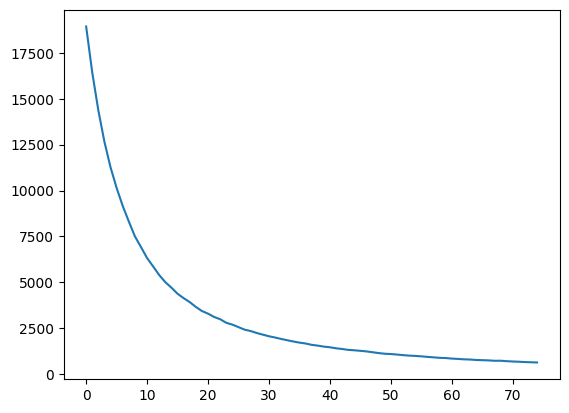

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_records)

In [ ]:
summed_gradients_all_mid = expected_gradients.sum(dim=0)
summed_gradients_all = summed_gradients_all_mid.sum(dim=1)

In [ ]:
summed_gradients_all

tensor([ 0.1309, -0.0489,  0.0228, -0.0712, -0.0612, -0.0339, -0.0768, -0.0242,
        -0.0687, -0.0201,  0.0490, -0.0338, -0.0158,  0.0459, -0.0988,  0.0003,
        -0.0222,  0.0536,  0.0022,  0.0704,  0.0308, -0.0048, -0.0740,  0.0297,
         0.0260,  0.0485, -0.0438,  0.0684,  0.0840, -0.0903, -0.0002,  0.0014,
         0.0300, -0.0298,  0.0396, -0.0212,  0.0251, -0.0854, -0.0490,  0.0650,
         0.0709,  0.1129,  0.0523,  0.0285,  0.0153,  0.0340,  0.0250, -0.0243,
         0.0020, -0.0433,  0.0184,  0.0537, -0.0383,  0.0406, -0.0031, -0.0862,
         0.0356,  0.0067, -0.0062,  0.0719,  0.1539,  0.0224,  0.0043, -0.0407,
        -0.0698,  0.0598, -0.1063, -0.1103,  0.0077,  0.0166, -0.0158,  0.0398,
         0.0097,  0.0581,  0.0164,  0.0066, -0.0162,  0.0454, -0.0937,  0.0233,
         0.0625, -0.0033,  0.0223, -0.0637,  0.0318,  0.0103,  0.0508,  0.0045,
         0.0578,  0.0573, -0.0022,  0.1230,  0.0762, -0.0366, -0.1010,  0.0083,
         0.0689, -0.0548,  0.1062, -0.05

In [ ]:
avg = torch.mean(summed_gradients_all)

<ipython-input-93-4ca07068794a>:56: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
<ipython-input-93-4ca07068794a>:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


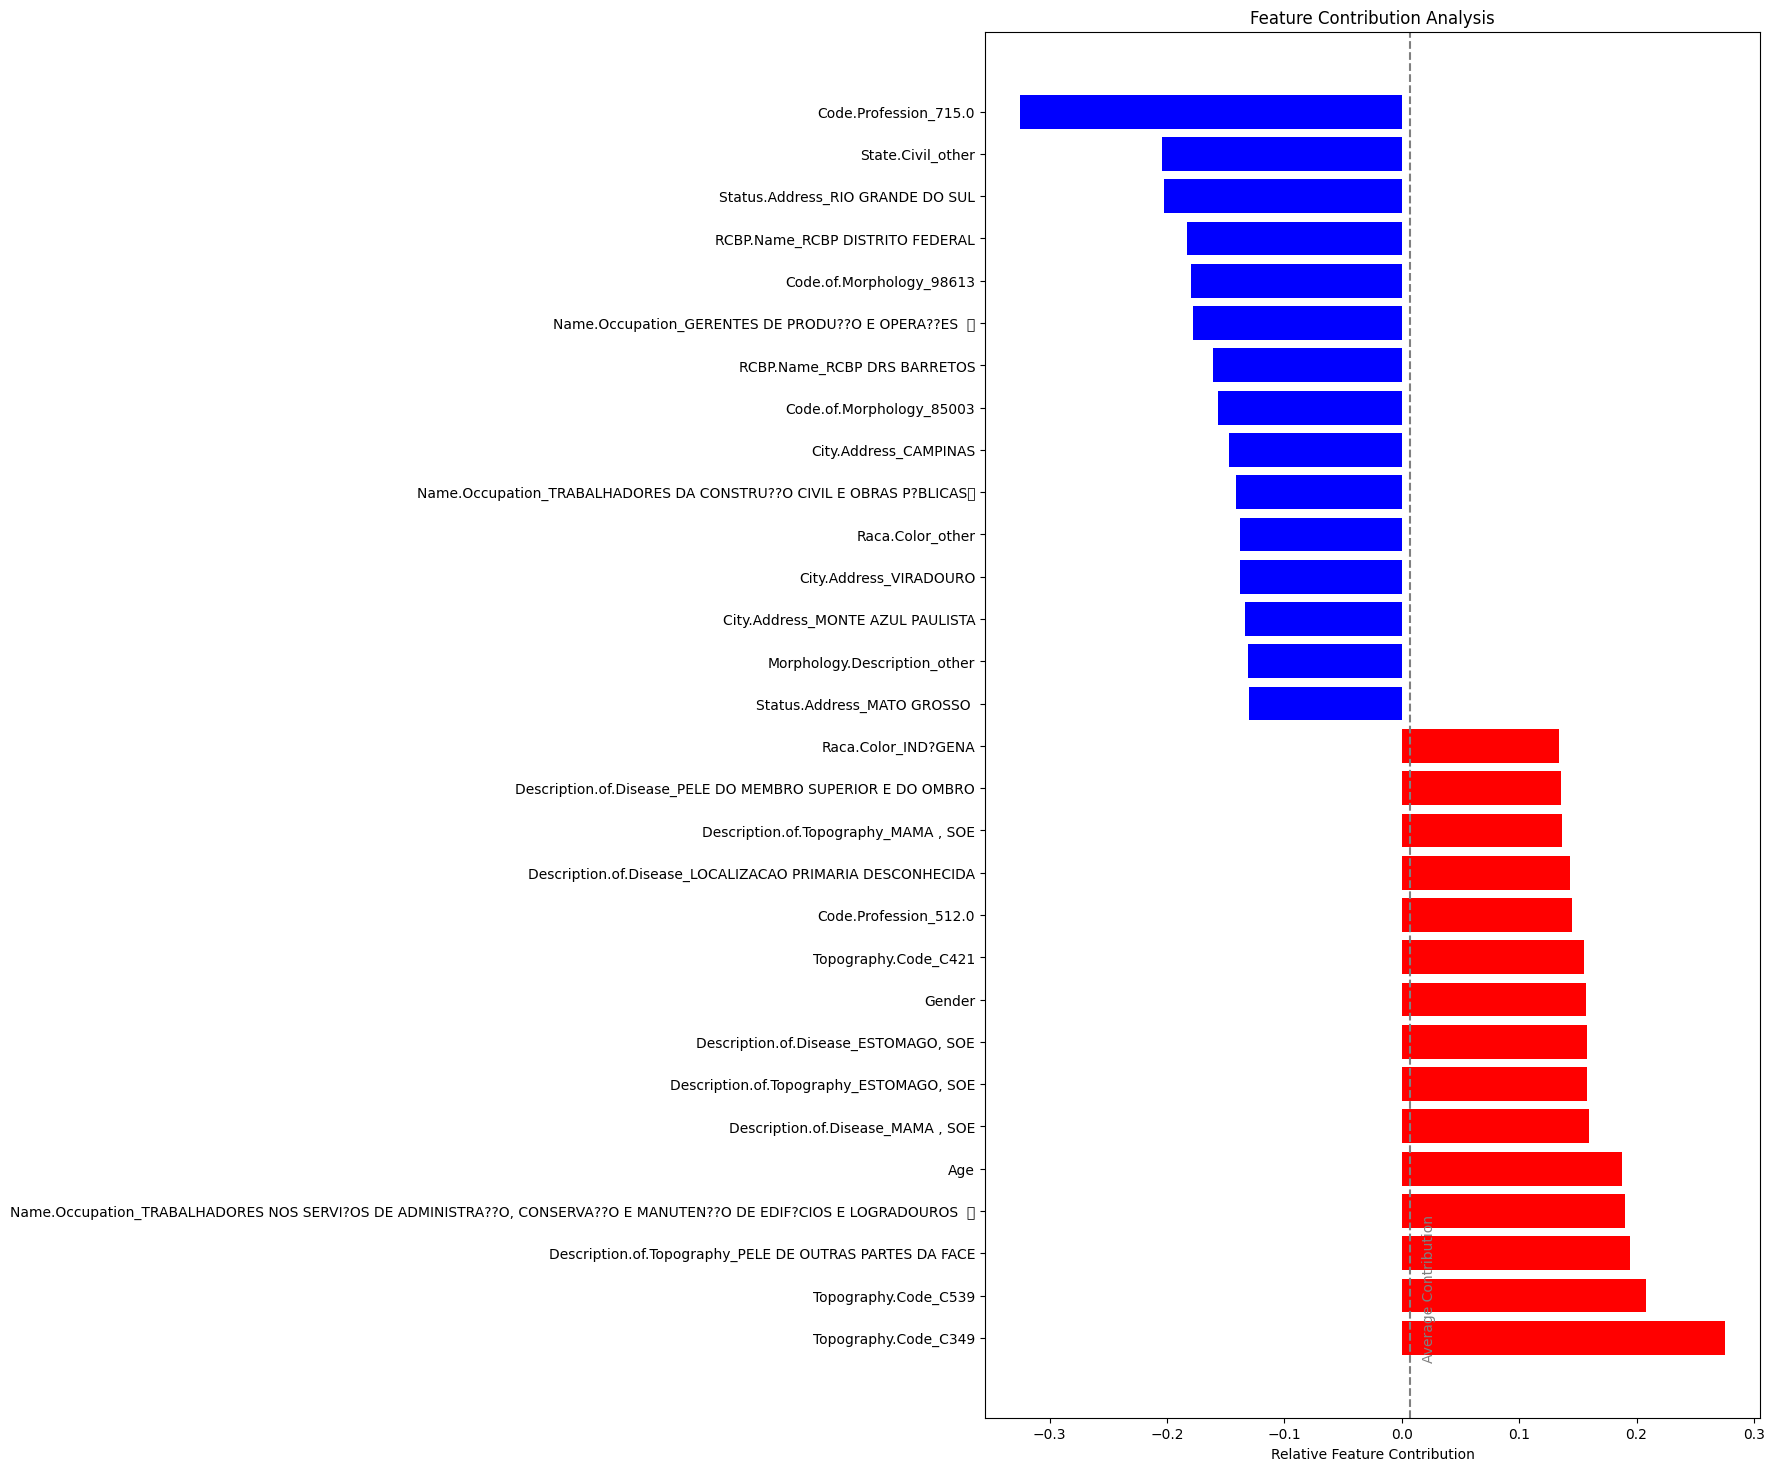

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = X.columns.tolist()

feature_contributions = [  3.1317e-04,  3.7437e-04, -5.1682e-05,  2.2592e-04, -2.0131e-04,
        -3.6441e-04, -3.2067e-04, -2.5101e-04,  6.7171e-05,  1.8189e-04,
        -2.4156e-04,  1.3197e-04,  1.0201e-04, -1.3636e-04,  2.5162e-04,
         2.6706e-04,  1.0930e-04,  3.4570e-05, -2.7591e-04,  8.5229e-05,
        -1.8313e-04,  2.1506e-04,  1.5450e-04, -1.8297e-04, -4.0744e-04,
        -1.1741e-05, -1.1923e-04,  1.4525e-04,  2.8966e-04, -1.3588e-04,
         8.7450e-05,  1.7980e-04, -6.4884e-04, -1.3977e-04, -1.3618e-04,
        -1.0380e-04, -3.5504e-04, -1.0430e-05,  7.1696e-05,  5.1061e-05,
        -2.8144e-04,  1.3035e-04,  3.7983e-04,  2.1676e-04,  1.4217e-04,
        -2.5159e-06,  3.5781e-05,  2.1663e-05, -2.5940e-04,  1.8010e-05,
         8.2136e-05, -4.3093e-05, -4.0406e-04, -8.0627e-05, -1.0971e-04,
        -1.8373e-04,  1.6203e-04,  7.1805e-05, -2.9379e-04,  7.9357e-05,
         1.5301e-04, -2.6602e-04, -2.0574e-04, -2.7544e-04, -3.1819e-05,
        -1.9965e-04,  3.1551e-04,  2.5288e-05,  2.7265e-04, -1.5573e-04,
         3.8845e-04, -1.4356e-04,  1.4634e-04, -9.7895e-05, -2.8566e-05,
        -1.8296e-04,  5.4910e-04,  3.0973e-04, -5.7816e-05,  7.4754e-05,
         1.1272e-04,  4.1589e-04,  2.8180e-05,  1.1064e-04,  2.1756e-06,
         1.4926e-04, -3.7169e-05, -1.8163e-04,  1.5452e-04,  1.7208e-04,
         1.7960e-04,  1.9830e-05,  9.2431e-05,  3.9056e-05, -2.6067e-04,
         2.2586e-04,  1.8207e-04, -1.8068e-04,  1.4399e-04, -8.6204e-05,
        -3.1204e-04,  7.1477e-05,  4.1172e-05, -3.5866e-04, -5.1865e-05,
         1.9480e-04,  1.2219e-04,  3.1482e-04,  2.8648e-04,  3.1856e-04,
         1.0685e-05,  2.7119e-04,  1.3675e-04, -2.5717e-04, -1.5045e-04,
         1.8576e-04,  5.9692e-05,  1.0102e-04, -2.2886e-04, -1.0209e-04,
         1.8473e-04,  1.2516e-04,  9.3679e-05, -1.4394e-04,  8.8879e-05,
         1.0694e-04,  2.1169e-04, -1.8707e-04,  4.5311e-06, -9.0323e-06,
         8.5298e-06,  8.9408e-05, -1.6008e-04,  7.7333e-05,  2.0472e-04,
         1.9104e-05,  2.0278e-05, -7.2255e-06]

feature_contributions = feature_contributions / np.sum(feature_contributions)
sorted_indices = np.argsort(feature_contributions)[::-1]
max15_indices = sorted_indices[:15]

min15_indices = sorted_indices[-15:]

selected_indices = np.concatenate([max15_indices, min15_indices])

fig, ax = plt.subplots(figsize=(10, len(selected_indices) * 0.6))
colors = ['red' if val > 0 else 'blue' for val in feature_contributions[selected_indices]]
ax.barh(range(len(selected_indices)), feature_contributions[selected_indices], color=colors)

ax.set_yticks(range(len(selected_indices)))
ax.set_yticklabels(np.array(feature_names)[selected_indices])
ax.set_xlabel("Relative Feature Contribution")

avg_contribution = 1 / len(feature_names)
ax.axvline(avg_contribution, ls='--', color='gray')

ax.text(avg_contribution+0.01, -0.5, 'Average Contribution', color='gray', rotation='vertical')
plt.title("Feature Contribution Analysis")
plt.tight_layout()
plt.show()

## Predictions and Evaluations
- Rewrote the predictions and evaluations

In [ ]:
# Created by Jingyan
model.eval()
test_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_test, _, _, _ in test_loader:
        # Forward pass
        X_test = X_test.to(device)
        task_outputs_ = model(X_test)
        print(X_test)
        # Store the predictions
        print(task_outputs_[0])
        test_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
test_predictions = [torch.cat([preds[i] for preds in test_predictions]) for i in range(len(test_predictions[0]))]



tensor([[1.0000, 0.6321, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.0000, 0.6509, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        [0.0000, 0.9151, 0.0000,  ..., 0.0000, 1.0000, 0.0000],
        ...,
        [1.0000, 0.5283, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.6698, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [1.0000, 0.5094, 0.0000,  ..., 0.0000, 0.0000, 1.0000]],
       device='cuda:0')
tensor([[0.5007],
        [0.5070],
        [0.5102],
        ...,
        [0.5325],
        [0.4920],
        [0.4879]], device='cuda:0')


In [ ]:
print(len(test_predictions))
print(test_predictions[0].shape)

7
torch.Size([2048, 1])


In [ ]:
# Created by Jingyan
model.eval()
train_predictions = []

# Disable gradient calculations
with torch.no_grad():
    for X_train, _, _, _ in train_loader:
        # Forward pass
        X_train = X_train.to(device)
        task_outputs_ = model(X_train)

        # Store the predictions
        train_predictions.append(task_outputs_)

# Process the predictions as needed
# For example, converting them to a list or concatenating
# Here we concatenate the predictions for each task
train_predictions = [torch.cat([preds[i] for preds in train_predictions]) for i in range(len(train_predictions[0]))]



In [ ]:
print(len(train_predictions))
print(train_predictions[0].shape)

7
torch.Size([10240, 1])


In [ ]:
# made by Xinyu
def binarize_and_sum_columns(output_list):
    def binarize_list(input_list):
        tensor = torch.Tensor(input_list)
        # print(input_list.max() == input_list.min())
        binary_tensor = (tensor >= 0.5).float()
        return binary_tensor

    result = binarize_list(output_list[0])
    for i in range(1, len(output_list)):
        binary_column = binarize_list(output_list[i])
        print(binary_column.max() == binary_column.min())
        result += binary_column

    return result


In [ ]:
# made by Xinyu
Y_hat_train = binarize_and_sum_columns(train_predictions)
Y_hat_train = Y_hat_train.squeeze()
print(Y_hat_train.shape)

Y_hat_test = binarize_and_sum_columns(test_predictions)
Y_hat_test = Y_hat_test.squeeze()
print(Y_hat_test.shape)

tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
torch.Size([10240])
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
tensor(True, device='cuda:0')
torch.Size([2048])


In [ ]:
# created by Jingyan
# Get the true labels and status
train_trues = []
train_statuses = []
for _, train_targets, train_masks, train_status in train_loader:
    true_label = [train_targets[i]*train_masks[i] for i in range(len(train_targets))]
    train_trues.append(true_label)
    train_statuses.append(train_status)
train_trues = [torch.cat([preds[i] for preds in train_trues]) for i in range(len(train_trues[0]))]
train_statuses = torch.cat([status for status in train_statuses])

print(len(train_trues))
print(train_trues[0].shape)
print(train_statuses.shape)

test_trues = []
test_statuses = []
for _, test_targets, test_masks, test_status in test_loader:
    true_label = [test_targets[i]*test_masks[i] for i in range(len(test_targets))]
    test_trues.append(true_label)
    test_statuses.append(test_status)

test_trues = [torch.cat([preds[i] for preds in test_trues]) for i in range(len(test_trues[0]))]
test_statuses = torch.cat([status for status in test_statuses])

print(len(test_trues))
print(test_trues[0].shape)
print(test_statuses.shape)

7
torch.Size([10240, 1])
torch.Size([10240])
7
torch.Size([2048, 1])
torch.Size([2048])


In [ ]:
# made by Xinyu
Y_true_train = binarize_and_sum_columns(train_trues)
Y_true_train = Y_true_train.squeeze()
print(Y_true_train.shape)

Y_true_test = binarize_and_sum_columns(test_trues)
Y_true_test = Y_true_test.squeeze()
print(Y_true_test.shape)
Y_true_train = Y_true_train.to(device)
train_statuses = train_statuses.to(device)
test_statuses = test_statuses.to(device)
Y_true_test = Y_true_test.to(device)

tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([10240])
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
tensor(False)
torch.Size([2048])


In [ ]:
#made by Ruiheng
#optimized c_index computational speed
import torch

class CindexOptimized(torch.nn.Module):
    def __init__(self):
        super(CindexOptimized, self).__init__()

    def forward(self, y, y_hat, status):
        if not torch.is_tensor(y):
            y = torch.tensor(y, dtype=torch.float32)
        if not torch.is_tensor(y_hat):
            y_hat = torch.tensor(y_hat, dtype=torch.float32)
        if not torch.is_tensor(status):
            status = torch.tensor(status, dtype=torch.float32)

        # replacing loop acceleration with matrix calculation
        y_diff = y.unsqueeze(1) - y.unsqueeze(0)
        y_hat_diff = y_hat.unsqueeze(1) - y_hat.unsqueeze(0)

        # status[i] and status[j] mark whether to censored data
        status_i = status.unsqueeze(1)
        status_j = status.unsqueeze(0)


        valid_pairs = torch.logical_or((y_diff <= 0) & (status_i == 1), (y_diff >= 0) & (status_j == 1)).float()
        torch.diagonal(valid_pairs).fill_(0) #Diagonal set to 0 to eliminate interference

        concordant_pairs = torch.logical_or((y_diff <= 0) & (y_hat_diff <= 0)&(status_i == 1),(y_diff >= 0) & (y_hat_diff >= 0)& (status_j == 1)).float()
        torch.diagonal(concordant_pairs).fill_(0) #Diagonal set to 0 to eliminate interference
        concordant_pairs = concordant_pairs.float()

        c_index = concordant_pairs.sum() / valid_pairs.sum()

        return c_index.item()


cindex_calculator_optimized = CindexOptimized()
c11_train = cindex_calculator_optimized(Y_true_train, Y_hat_train, train_statuses)
print(f"C-index for Training Data: {c11_train:.4f}")
c11_test = cindex_calculator_optimized(Y_true_test, Y_hat_test, test_statuses)
print(f"C-index for Test Data: {c11_test:.4f}")

#According to the way in your paper
# c = 1 / num * Σi=1^num Σj>i [yj > yi * I[S(^yj|Xj) > S(^yi|Xi)]]

C-index for Training Data: 0.8512
C-index for Test Data: 0.8521


I have modified the c-index according to Dr. Li's github code, we might not need the following part. (Jingyan)

In [ ]:
print(c11_train)
print(c11_test)

0.8511641621589661
0.8520520925521851


In [ ]:
class Cindex(torch.nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, y, y_hat, status):

        status_matrix = status.repeat(status.size(0), 1)
        cmp_mask = (y.repeat(status.size(0), 1) - y) * (status_matrix - status_matrix.t())
        concordant = torch.where(
            (y_hat.repeat(status.size(0), 1) - y_hat) * cmp_mask > 0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        total_pairs = torch.where(
            cmp_mask !=0,
            torch.ones_like(cmp_mask), torch.zeros_like(cmp_mask))

        return concordant.sum() / total_pairs.sum()

In [ ]:
cindex_calculator = Cindex()
c11_train = cindex_calculator(Y_true_train, Y_hat_train, train_statuses)

In [ ]:
c11_train

tensor(nan, device='cuda:0')

In [ ]:
Y_test_train = Y_true_train.cuda(0)
Y_hat_train = Y_hat_train.cuda(0)
train_statuses = train_statuses.cuda(0)